<img src='logo2.png'><br>
* ref : https://www.kaggle.com/vikrishnan/boston-house-prices?select=housing.csv

<img src="logo.png">

In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets
from pycaret.regression import *

In [3]:
df= pd.read_csv('./toy_boston_houseprice.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# clf = setup(
#     data=df,                                              # train
#     target='target',                                      # 라벨 컬럼명
#     # train_size: float = 0.7,
#     # test_data: Optional[pd.DataFrame] = None,
#     # preprocess: bool = True,
#     # categorical_features: Optional[List[str]] = None,   # 범주형 컬럼 설정
#     # categorical_imputation: str = "constant",           # 범주형 결측치
#     # ordinal_features: Optional[Dict[str, list]] = None, # 명목형 컬럼 설정
#     # numeric_features: Optional[List[str]] = None,       # 수치형 컬럼 설정. map 인코딩
#     # numeric_imputation: str = "mean",                   # 수치형 결측치
#     # date_features: Optional[List[str]] = None,          # 날짜 컬럼
#     # ignore_features: Optional[List[str]] = None,        # drop
#     # normalize: bool = False,                            # scale
#     # normalize_method: str = "zscore",                   # default StandardScaler()
#     # transformation: bool = False,                       # 정규화
#     # transformation_method: str = "yeo-johnson",         # default box-cox의 개선 방식
#     # pca: bool = False,
#     # pca_components: Optional[float] = None,
#     # ignore_low_variance: bool = False,
#     # bin_numeric_features: Optional[List[str]] = None,   # 구간화
#     # remove_outliers: bool = False,
#     # outliers_threshold: float = 0.05,                   # 이상값 처리할 데이터 범위
#     # remove_multicollinearity: bool = False,             # 다중공선 제거
#     # multicollinearity_threshold: float = 0.9,           # 다중공선 제거할 상관계수 설정
#     # remove_perfect_collinearity: bool = True,
#     # feature_selection: bool = False,                    # 랜덤포레스트의 컬럼 샘플링 방식
#     # feature_selection_threshold: float = 0.8,
#     # feature_interaction: bool = False,                  # 컬럼1 * 컬럼2 연산
#     # feature_ratio: bool = False,                        # 컬럼1 / 컬럼2 연산
#     # fix_imbalance: bool = False,                        # 라벨 데이터 불균형
#     # fix_imbalance_method: Optional[Any] = None,         # default SMOTE
#     # data_split_shuffle: bool = True,
#     # data_split_stratify: Union[bool, List[str]] = False,
#     # fold_strategy: Union[str, Any] = "stratifiedkfold", # kfold, skfold, timeseries 등
#     fold=5,
#     # fold_shuffle: bool = False,
#     # profile=True                                        # pandas profiling
# )

In [8]:
# clf = setup(data=df, target='target', fold=5, profile=True)

In [9]:
# models() # 사용가능한 모델과 ID

In [10]:
# top3 = compare_models(
#     sort='MSE',                                         # 정렬할 metrics
#     n_select=3,                                        # 상위 n개 모델
# )

In [11]:
# gbr = create_model('gbr', fold=5)

In [12]:
# gbr

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action='ignore')


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# 1차 점수

In [14]:
X = df.drop(['target'], axis=1)
y = df['target']

In [15]:
X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.2)

In [16]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), Ridge(), Lasso(), ElasticNet(), XGBRegressor(), LGBMRegressor()]
for model in models:
    model.fit(X_train,  y_train,)
    pred = model.predict(X_val)
    mse  = mean_squared_error(y_val, pred)
    rmse = mean_squared_error(y_val, pred, squared=False)
    print(f"{model.__class__.__name__}\t MSE:{mse:.4f} RMSE:{rmse:.4f}")

LinearRegression	 MSE:28.5982 RMSE:5.3477
DecisionTreeRegressor	 MSE:19.8383 RMSE:4.4540
RandomForestRegressor	 MSE:11.2313 RMSE:3.3513
Ridge	 MSE:29.1375 RMSE:5.3979
Lasso	 MSE:34.3744 RMSE:5.8630
ElasticNet	 MSE:34.0436 RMSE:5.8347
XGBRegressor	 MSE:9.0650 RMSE:3.0108
LGBMRegressor	 MSE:10.2601 RMSE:3.2031


# EDA

<AxesSubplot:>

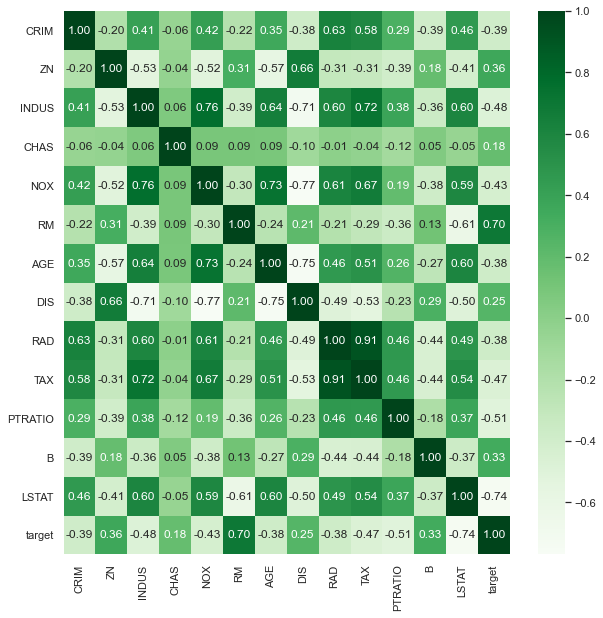

In [17]:
f= plt.subplots(figsize= (10,10))
sns.heatmap(df.corr(), fmt= '.2f', annot= True, cmap= 'Greens')

## 상관계수 <font color= 'skyblue'> 0.7 </font> 이상인 컬럼 PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
df['pca1'] = pca.fit_transform(df[['TAX', 'RAD']]) # 0.91

pca = PCA(n_components=2)
df[['pca2', 'pca3']] = pca.fit_transform(df[['NOX', 'INDUS', 'DIS', 'AGE']]) # 각 컬럼끼리 상관계수가 0.7이 넘음

df.drop(['TAX', 'RAD', 'NOX', 'INDUS', 'DIS', 'AGE'], axis=1, inplace= True) 

<AxesSubplot:>

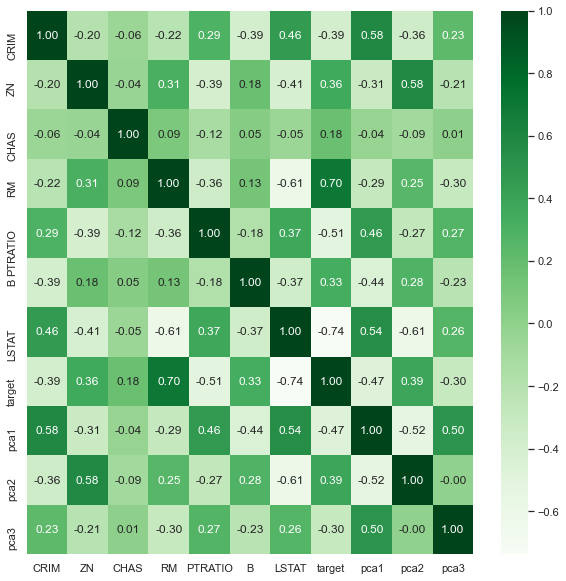

In [19]:
f= plt.subplots(figsize= (10,10))
sns.heatmap(df.corr(), fmt= '.2f', annot= True, cmap= 'Greens')

## 아웃라이어 제거

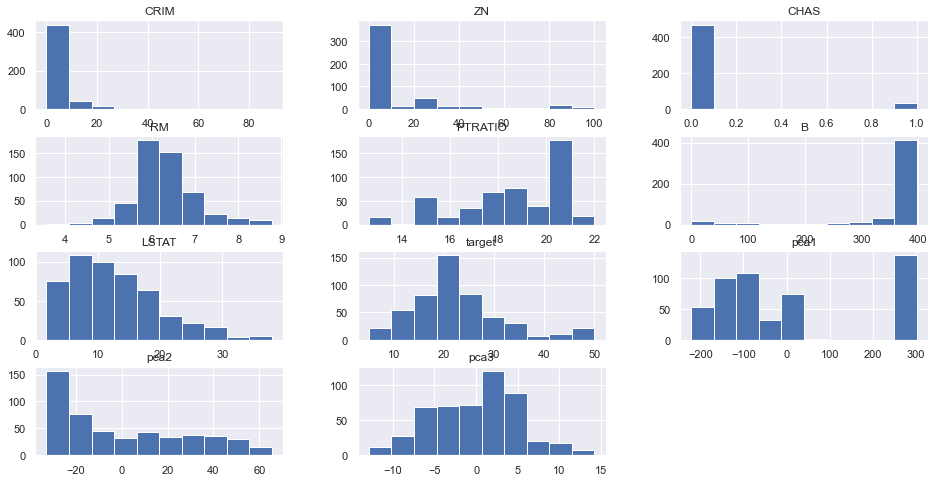

In [20]:
df.hist(figsize= (16,8))
plt.show()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64


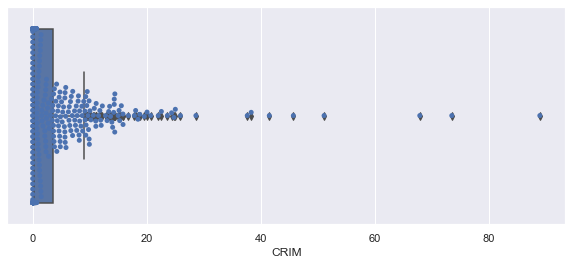

In [21]:
print(df['CRIM'].describe())
f= plt.subplots(figsize=(10,4))
sns.boxplot(x =df['CRIM'])
sns.swarmplot(x= df['CRIM'])
plt.show()

In [22]:
# 60을 초과한 값 제거
crim_idx = df[df['CRIM']>60].index
crim_idx

Int64Index([380, 405, 418], dtype='int64')

In [23]:
df.drop(index=crim_idx, axis=0, inplace=True)

In [24]:
# 제거됐는지 확인
# df.loc[380]

count    503.000000
mean     357.214195
std       90.271083
min        0.320000
25%      375.425000
50%      391.450000
75%      396.220000
max      396.900000
Name: B, dtype: float64


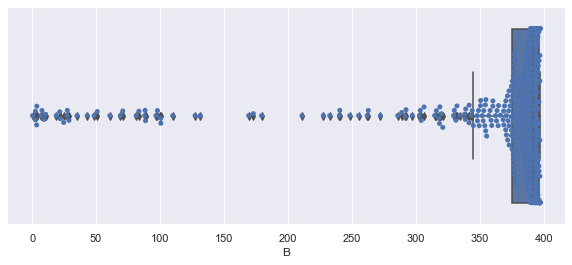

In [25]:
print(df['B'].describe())
f= plt.subplots(figsize=(10,4))
sns.boxplot(x= df['B'])
sns.swarmplot(x= df['B'])
plt.show()

In [26]:
# 150 미만값 제거
b_idx = df[df['B']<150].index
b_idx

Int64Index([102, 155, 156, 367, 410, 411, 412, 414, 415, 416, 417, 419, 423,
            424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
            437, 438, 445, 450, 454, 455, 456, 457, 466],
           dtype='int64')

In [27]:
df.drop(index=b_idx, axis=0, inplace=True)

In [28]:
# index
df = df.reset_index(drop=True)

# log
* 값에 <font color= 'red'>음수</font>가 있으면 <font color= 'red'> log화 X </font>

In [29]:
# log화 할 컬럼 선정
# for col in df.columns:
#     print(col, df[col].unique())

In [30]:
df.head()

,CRIM,ZN,CHAS,RM,PTRATIO,B,LSTAT,target,pca1,pca2,pca3
0,0.00632,18.0,0.0,6.575,15.3,396.90,4.98,24.0,-112.514926,4.758984,-8.116622
1,0.02731,0.0,0.0,6.421,17.8,396.90,9.14,21.6,-166.408267,-9.456356,-5.834574
2,0.02729,0.0,0.0,7.185,17.8,392.83,4.03,34.7,-166.408267,8.084606,-2.877745
3,0.03237,0.0,0.0,6.998,18.7,394.63,2.94,33.4,-186.339174,24.008030,-5.252097
4,0.06905,0.0,0.0,7.147,18.7,396.90,5.33,36.2,-186.339174,15.730273,-6.647455


In [31]:
# log_cols= ['ZN', 'LSTAT', 'B', 'PTRATIO', 'INDUS', 'AGE',] #  'TAX', 'RAD',
# for col in log_cols:
#     df[col] = np.log1p(df[col])

# 스케일링

In [32]:
# target 제외하고 스케일링

scalers = [RobustScaler()] # , MinMaxScaler(), RobustScaler()]
for scaler in scalers:
    scaler.fit(df.drop('target', axis= 1))
    scaler_df= scaler.fit_transform(df.drop('target', axis= 1))

In [33]:
scaler_df= pd.DataFrame(scaler_df, columns=df.drop('target', axis= 1).columns)
scaler_df.head()

,CRIM,ZN,CHAS,RM,PTRATIO,B,LSTAT,pca1,pca2,pca3
0,-0.132396,0.9,0.0,0.489769,-1.030303,0.251028,-0.601595,-0.094926,0.172815,-1.031713
1,-0.118806,0.0,0.0,0.283126,-0.272727,0.251028,-0.144075,-0.432132,-0.100816,-0.741548
2,-0.118819,0.0,0.0,1.308286,-0.272727,0.020139,-0.706076,-0.432132,0.236830,-0.365584
3,-0.115530,0.0,0.0,1.057363,0.000000,0.122252,-0.825955,-0.556838,0.543339,-0.667485
4,-0.091782,0.0,0.0,1.257296,0.000000,0.251028,-0.563101,-0.556838,0.384001,-0.844907


In [34]:
scaler_df['target']= df['target']

# 2차 점수

<font color= 'skyblue'> EDA 안한 1차 점수</font>
<pre>

LinearRegression	 MSE:31.4064 RMSE:5.6041
DecisionTreeRegressor	 MSE:34.6887 RMSE:5.8897
RandomForestRegressor	 MSE:21.5386 RMSE:4.6410
Ridge	 MSE:32.2951 RMSE:5.6829
Lasso	 MSE:31.2626 RMSE:5.5913
ElasticNet	 MSE:31.0683 RMSE:5.5739
XGBRegressor	 MSE:21.0888 RMSE:4.5923
LGBMRegressor	 MSE:17.5348 RMSE:4.1875

</pre>

In [35]:
X = scaler_df.drop(['target'], axis=1)
y = scaler_df['target']

In [36]:
X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.2)

In [37]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), Ridge(), Lasso(), ElasticNet(), XGBRegressor(), LGBMRegressor()]
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)

    # y_val_exp= np.expm1(y_val)

    mse  = mean_squared_error(y_val, pred)
    rmse = mean_squared_error(y_val, pred, squared=False)
    print(f"{model.__class__.__name__}\t MSE:{mse:.4f} RMSE:{rmse:.4f}")

LinearRegression	 MSE:37.6305 RMSE:6.1344
DecisionTreeRegressor	 MSE:17.1052 RMSE:4.1358
RandomForestRegressor	 MSE:17.0778 RMSE:4.1325
Ridge	 MSE:37.4711 RMSE:6.1214
Lasso	 MSE:39.8331 RMSE:6.3113
ElasticNet	 MSE:44.7522 RMSE:6.6897
XGBRegressor	 MSE:18.6448 RMSE:4.3180
LGBMRegressor	 MSE:18.0991 RMSE:4.2543


## 규제(alpha= 10) 준 점수

In [38]:
# L1
lasso = Lasso(alpha= 10, normalize= False, max_iter= 1000) # , random_state= 0
# L2
ridge = Ridge(alpha= 10, normalize= False, max_iter= 1000)
# L1(r):L2(1-r)
elasticnet = ElasticNet(alpha= 10, normalize= False, max_iter= 1000, l1_ratio= 0.5)

# elasticnet.get_params().keys()

In [39]:
models = [lasso, ridge, elasticnet]
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_val)

    # y_val_exp= np.expm1(y_val)

    mse  = mean_squared_error(y_val, pred)
    rmse = mean_squared_error(y_val, pred, squared=False)

    print(f"{model.__class__.__name__}\t MSE:{mse:.4f} RMSE:{rmse:.4f}")

Lasso	 MSE:99.4268 RMSE:9.9713
Ridge	 MSE:36.5443 RMSE:6.0452
ElasticNet	 MSE:93.2326 RMSE:9.6557


# 학습량 늘리기
* 오버피팅을 피하기 위함

In [40]:
from sklearn.model_selection import KFold, StratifiedKFold 

kfold = KFold(n_splits=3, shuffle=True, random_state=0)

tot_mse= []
tot_rmse = []

for train_index, val_index in kfold.split(X): # X만 뒤섞고 그 X의 index에 해당하는 y를 들고옴

    X_train, X_val = X.iloc[train_index], X.iloc[val_index] 
    y_train, y_val = y.iloc[train_index], y.iloc[val_index] 

    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)

    mse  = mean_squared_error(y_val, pred)
    rmse = mean_squared_error(y_val, pred, squared=False)
    tot_mse.append(mse)
    tot_rmse.append(rmse)

    print('MSE:', mse, 'RMSE:', rmse)
print('MSE_avg:', np.array(tot_mse).mean())
print('RMSE_avg:', np.array(tot_rmse).mean())

MSE: 20.16668030769232 RMSE: 4.490732713900074
MSE: 15.54651962179487 RMSE: 3.9429075086533376
MSE: 12.253471134615383 RMSE: 3.500495841250977
MSE_avg: 15.988890354700857
RMSE_avg: 3.9780453546014627


# 정리
* log화를 하면 점수가 더 안좋아짐
* 데이터셋의 수가 적어 XGB, LGBM은 오버피팅을 불러올 수 있기에 모델로 RandomForestRegressor을 씀
